STEP 1: Importing libraries...
✅ Libraries imported successfully.

STEP 2: Loading and exploring the dataset...
✅ File 'high_school.csv' loaded successfully!

STEP 3: Cleaning the data...
🧠 54625 rows with missing data were removed.
Number of remaining rows: 59615

STEP 4: Generating all requested visualizations...
📊 Generating Success vs. Failure chart...


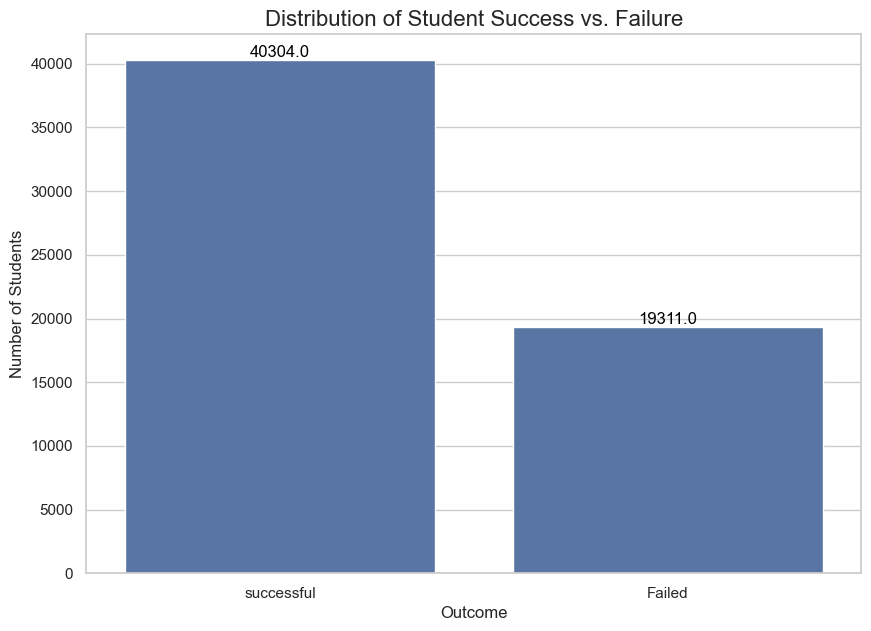

📊 Generating Top 10 Cities chart...


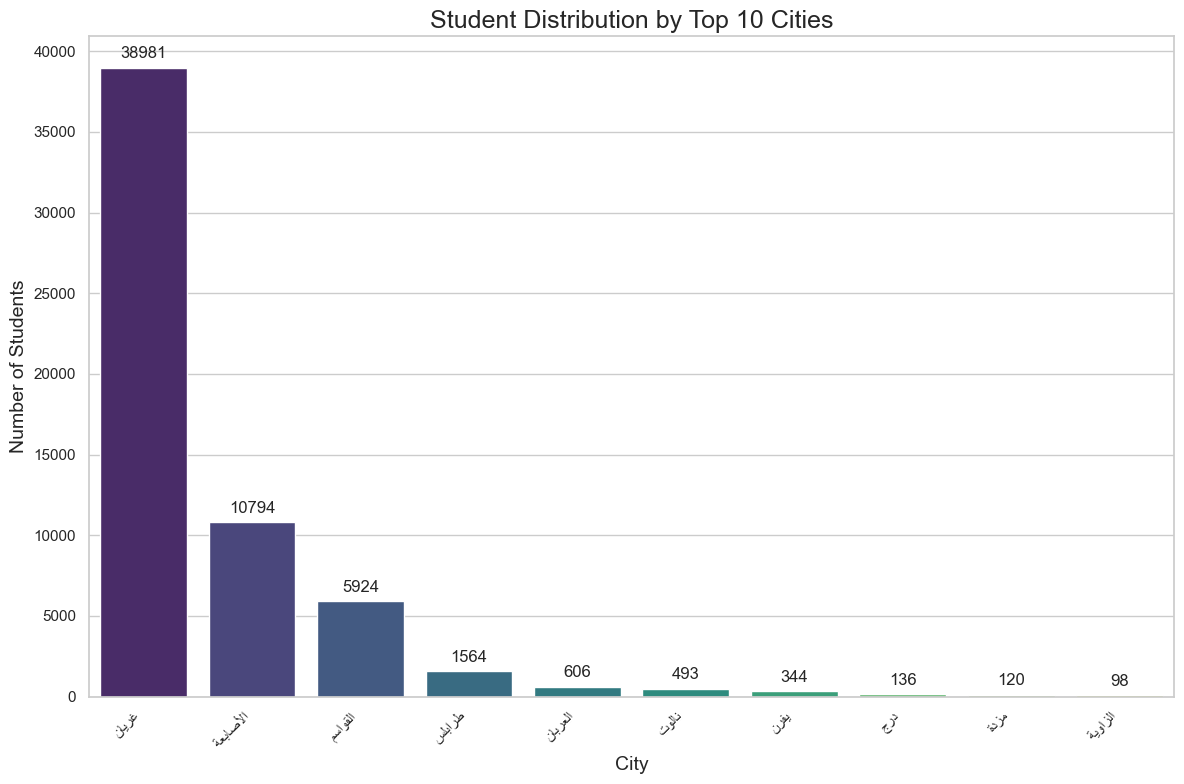

📊 Generating Gender Distribution chart...


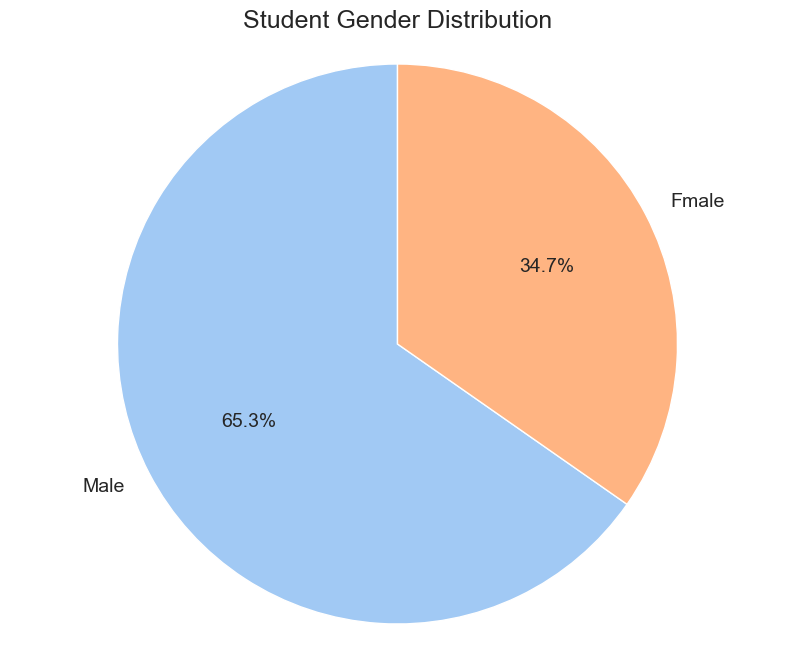

📊 Generating Birth Year Distribution chart...


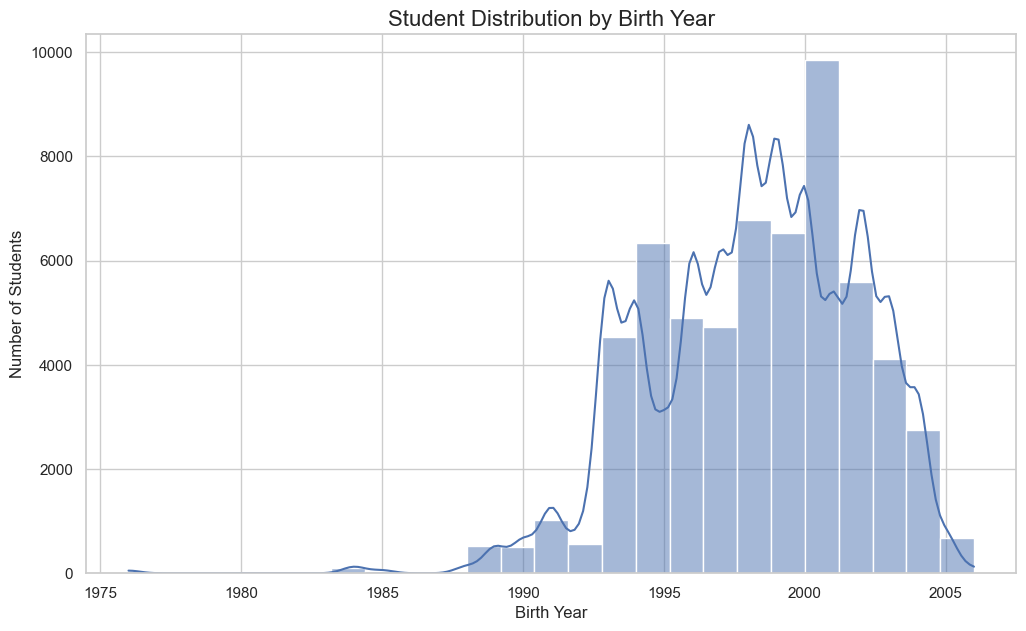

📊 Generating Top 10 Specializations chart...


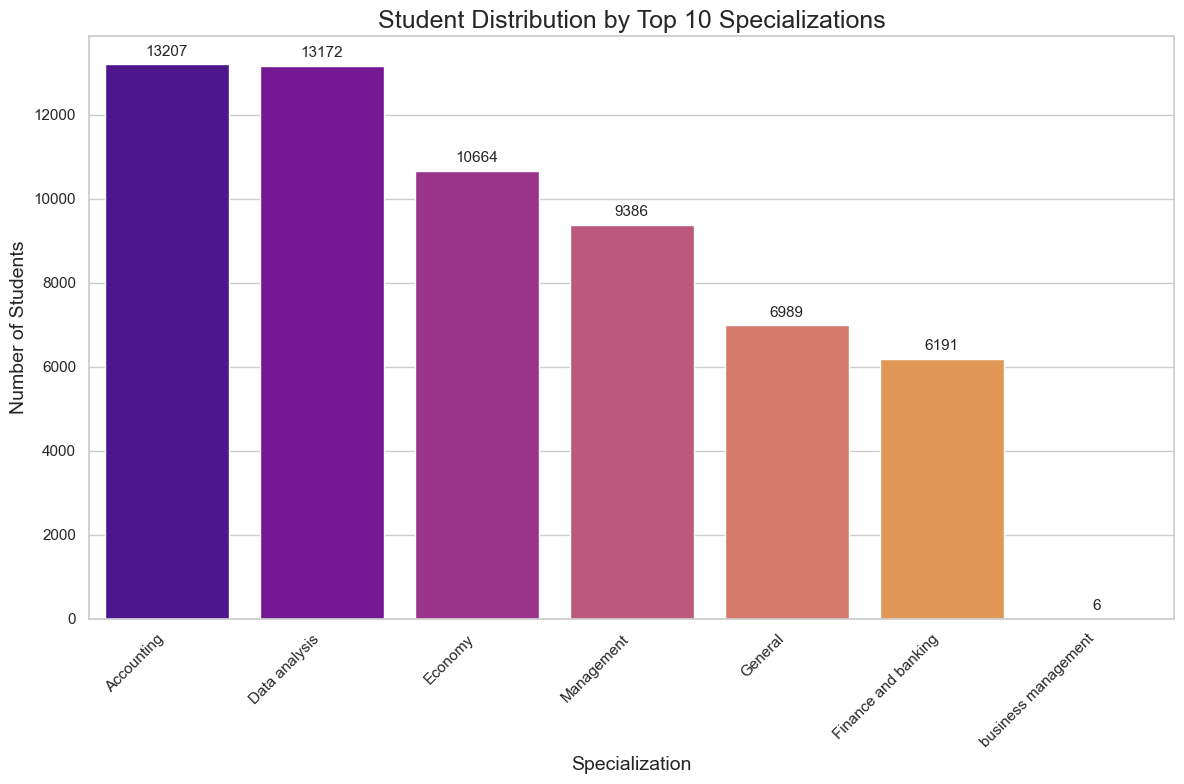

📊 Generating School System Distribution chart...


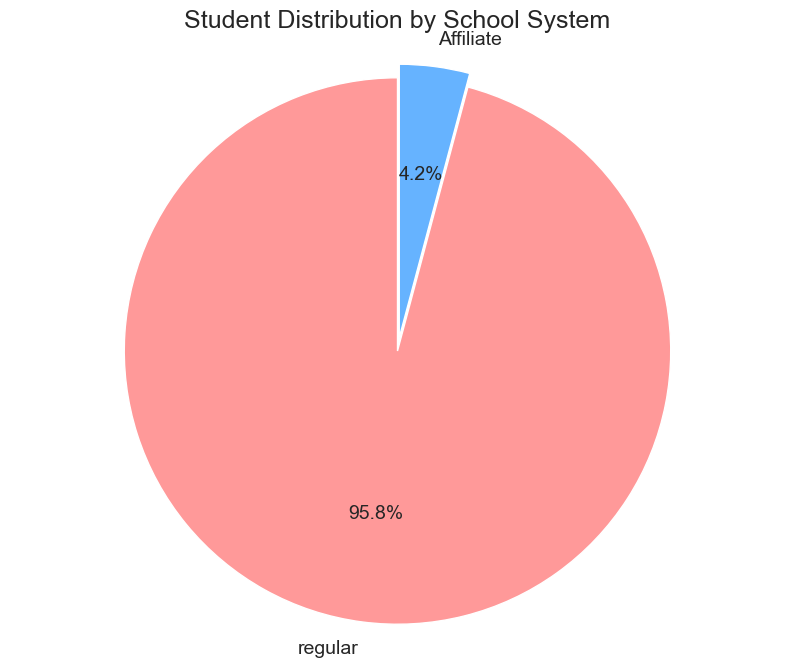



✅ Analysis complete. All visualizations have been generated.


In [6]:
# ==============================================================================
#                      Student Academic Performance Analysis
# ==============================================================================

# -----------------------------------------------------
# STEP 1: Import Essential Libraries
# -----------------------------------------------------
print("STEP 1: Importing libraries...")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Libraries to correctly display Arabic text
import arabic_reshaper
from bidi.algorithm import get_display

# Ignore any future warnings for a cleaner output
warnings.filterwarnings('ignore')
print("✅ Libraries imported successfully.")

# -----------------------------------------------------
# STEP 2: Load and Explore the Dataset
# -----------------------------------------------------
print("\nSTEP 2: Loading and exploring the dataset...")
file_name = "high_school.csv"

try:
    df = pd.read_csv(file_name)
    print(f"✅ File '{file_name}' loaded successfully!")
except FileNotFoundError:
    print(f"❌ ERROR: The file '{file_name}' was not found. Please ensure it's in the same folder.")
    exit()

# -----------------------------------------------------
# STEP 3: Clean the Data
# -----------------------------------------------------
print("\nSTEP 3: Cleaning the data...")
initial_rows = len(df)
# Drop rows with any missing values to ensure data quality
df_cleaned = df.dropna()
cleaned_rows = len(df_cleaned)

print(f"🧠 {initial_rows - cleaned_rows} rows with missing data were removed.")
print(f"Number of remaining rows: {cleaned_rows}")

# -----------------------------------------------------
# STEP 4: Generate All Visualizations
# -----------------------------------------------------
print("\nSTEP 4: Generating all requested visualizations...")

# Set a consistent and attractive theme for all plots
sns.set_theme(style="whitegrid", font="Arial") # Use a font that supports Arabic glyphs

# --- Visualization 1: Success vs. Failure Distribution ---
print("📊 Generating Success vs. Failure chart...")
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_cleaned, x='Pass or fail?', order=df_cleaned['Pass or fail?'].value_counts().index)
plt.title('Distribution of Student Success vs. Failure', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

# --- Visualization 2: Top 10 Cities by Student Count (with Arabic text) ---
print("📊 Generating Top 10 Cities chart...")
plt.figure(figsize=(12, 8))
top_10_cities = df_cleaned['city'].value_counts().head(10)

# Reshape Arabic city names for correct display
reshaped_cities = [get_display(arabic_reshaper.reshape(city)) for city in top_10_cities.index]

ax_city = sns.barplot(x=reshaped_cities, y=top_10_cities.values, palette="viridis")
plt.title('Student Distribution by Top 10 Cities', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45, ha='right')
for p in ax_city.patches:
    ax_city.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.tight_layout()
plt.show()

# --- Visualization 3: Gender Distribution ---
print("📊 Generating Gender Distribution chart...")
plt.figure(figsize=(10, 8))
gender_counts = df_cleaned['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), textprops={'fontsize': 14})
plt.title('Student Gender Distribution', fontsize=18)
plt.axis('equal')
plt.show()

# --- Visualization 4: Birth Year Distribution ---
print("📊 Generating Birth Year Distribution chart...")
plt.figure(figsize=(12, 7))
sns.histplot(df_cleaned['date of birth'], kde=True, bins=25)
plt.title('Student Distribution by Birth Year', fontsize=16)
plt.xlabel('Birth Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

# --- Visualization 5: Top 10 Specializations ---
print("📊 Generating Top 10 Specializations chart...")
plt.figure(figsize=(12, 8))
top_10_specs = df_cleaned['Specialization ID'].value_counts().head(10)
ax_spec = sns.barplot(x=top_10_specs.index, y=top_10_specs.values, palette="plasma")
plt.title('Student Distribution by Top 10 Specializations', fontsize=18)
plt.xlabel('Specialization', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45, ha='right')
for p in ax_spec.patches:
    ax_spec.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11)
plt.tight_layout()
plt.show()

# --- Visualization 6: School System (Regular vs. Affiliate) ---
print("📊 Generating School System Distribution chart...")
plt.figure(figsize=(10, 8))
system_counts = df_cleaned['School system'].value_counts()
plt.pie(system_counts, labels=system_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#ff9999','#66b3ff'], textprops={'fontsize': 14},
        explode=(0.05, 0)) # Slightly separate the first slice
plt.title('Student Distribution by School System', fontsize=18)
plt.axis('equal')
plt.show()

print("\n\n✅ Analysis complete. All visualizations have been generated.")